#### Load Tools

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\ysanc\OneDrive\Desktop\Resume Screening project\data\clean_resume_data.csv")

In [4]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [5]:
df.shape

(2484, 3)

#### Exploratory Data analysis

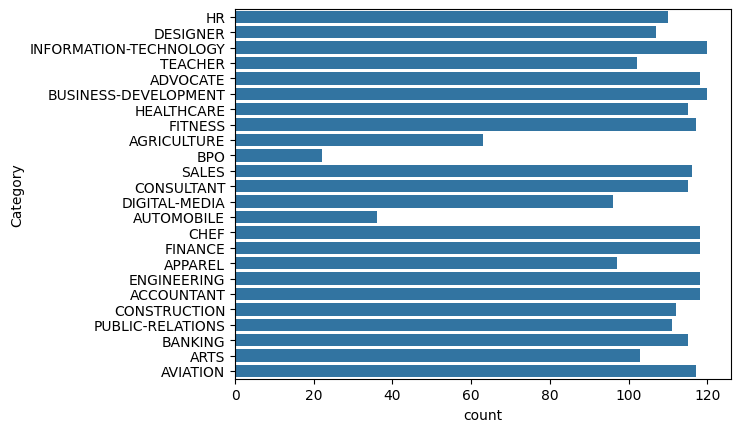

In [6]:
plt.Figure(figsize=(15, 5))
sns.countplot(df['Category'])
plt.show()

([<matplotlib.patches.Wedge at 0x1fdf703fe00>,
 [Text(1.0873558985304643, 0.16630438939188294, 'HR'),
  Text(0.9879404766659289, 0.483708191542274, 'DESIGNER'),
  Text(0.8001110148396715, 0.7548657920002939, 'INFORMATION-TECHNOLOGY'),
  Text(0.5427552970145121, 0.9567741047722231, 'TEACHER'),
  Text(0.2374045338432916, 1.0740759225076455, 'ADVOCATE'),
  Text(-0.08893988033794423, 1.0963985122597861, 'BUSINESS-DEVELOPMENT'),
  Text(-0.40741943831722166, 1.0217677824639413, 'HEALTHCARE'),
  Text(-0.6887871215943964, 0.8576551178216723, 'FITNESS'),
  Text(-0.9089746228635491, 0.6194878005175475, 'AGRICULTURE'),
  Text(-1.0497142428046182, 0.3287856573105451, 'BPO'),
  Text(-1.099928739161177, 0.012520733497043118, 'SALES'),
  Text(-1.0573112973650307, -0.3034679891920658, 'CONSULTANT'),
  Text(-0.9258571907028171, -0.5939599838574039, 'DIGITAL-MEDIA'),
  Text(-0.7197732137004842, -0.8318212072550673, 'AUTOMOBILE'),
  Text(-0.45983078365386687, -0.9992775642454258, 'CHEF'),
  Text(-0.16630

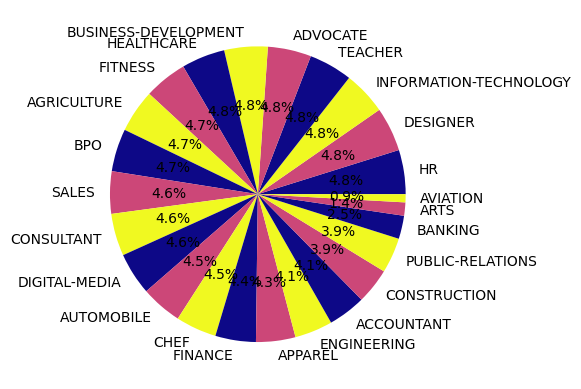

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.Figure(figsize=(100,90))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=False, colors=plt.cm.plasma(np.linspace(0,1,3)))

#### Balance Dataset

In [8]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categorical with few samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)

    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [9]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [10]:
# Check missing values

In [11]:
# Fill null values
balanced_df.dropna(inplace=True)

#### Train-Test split

In [12]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Encoding (TF-IDF)

In [13]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 180421 stored elements and shape (576, 28858)>

#### Train Random Forest Classifier

In [14]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8802083333333334

In [15]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.82      0.90      0.86        20
              ADVOCATE       0.96      0.79      0.87        29
           AGRICULTURE       0.95      0.91      0.93        23
               APPAREL       0.90      0.86      0.88        22
                  ARTS       0.94      0.71      0.81        21
            AUTOMOBILE       0.95      0.95      0.95        19
              AVIATION       0.93      0.93      0.93        28
               BANKING       0.95      0.91      0.93        22
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.88      0.78      0.82        18
                  CHEF       0.85      1.00      0.92        28
          CONSTRUCTION       0.90      1.00      0.95        28
            CONSULTANT       0.92      0.71      0.80        31
              DESIGNER       1.00      0.79      0.88        28
         DIGITAL-MEDIA       0.91      

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  0,  0,  1,  1],
       [ 1,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 19,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

#### Predictive system

#### Save Files

In [19]:
import os
import pickle

# Create the directory if it doesn't exist
os.makedirs('artifacts', exist_ok=True)

# Save the model

with open('artifacts/rf_classifier_categorization.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

with open('artifacts/tfidf_vectorizor_categorization.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
